In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### dropping the column Cabin because it has too many null values:

In [7]:
train = train.drop("Cabin", axis=1)

### dropping useless columns:

In [8]:
train = train.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [9]:
import seaborn as sns

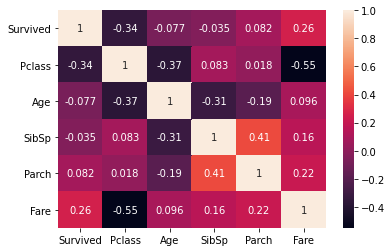

In [10]:
sns.heatmap(train.corr(), annot=True)

# fillling null values of Age and Embarked columns

In [11]:
mean_age = train['Age'].mean()

In [12]:
x = train[train['Age'].isnull()].index.values

for i in x:
    train.loc[i,'Age'] = mean_age

In [13]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [15]:
train['Embarked'].fillna(value="S", inplace=True)

In [16]:
train['Gender'] = 0

males = train.loc[train['Sex'] == "male"].index

females = train.loc[train['Sex'] == "female"].index

for i in males:
    train.loc[i,'Gender'] = 0

for i in females:
    train.loc[i,'Gender'] = 1

In [17]:
train = train.drop(["Sex"], axis=1)

In [18]:
train['FareBand'] = 0

In [19]:
zero_index = train.loc[(train['Fare'] >= 0) & (train['Fare'] <= 7.91)].index

In [20]:
one_index = train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454)].index
two_index = train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31)].index
three_index = train.loc[train['Fare'] > 31].index
#train[(train['Fare'] > 14.454) & (train['Fare'] <= 31)]['FareBand'] = 2
#train[train['Fare'] > 31]['FareBand'] = 3

In [21]:
for i in zero_index:
    train.loc[i,'FareBand'] = 0

for i in one_index:
    train.loc[i,'FareBand'] = 1
    
for i in two_index:
    train.loc[i,'FareBand'] = 2
    
for i in three_index:
    train.loc[i,'FareBand'] = 3

In [22]:
train = train.drop("Fare", axis=1)

In [23]:
train.loc[ train['Age'] <= 16, 'Age'] = 0


In [24]:
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age']= 4

In [25]:
train.loc[ train['Embarked']== "S", 'Embarked']= 1

In [26]:
train.loc[ train['Embarked']== "C", 'Embarked']= 2

In [27]:
train.loc[ train['Embarked']== "Q", 'Embarked']= 0

In [28]:
X = train[["Pclass", "Age", "SibSp", "Parch","Embarked", "Gender", "FareBand"]]

In [29]:
Y = train["Survived"]

In [30]:
from sklearn import model_selection

In [31]:
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X, Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
kfold = model_selection.KFold(n_splits=5)

In [33]:
accuracy = model_selection.cross_val_score(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=kfold,
                                          scoring="accuracy")

In [34]:
accuracy

array([0.72067039, 0.79213483, 0.76966292, 0.71348315, 0.80898876])

In [35]:
precision = model_selection.cross_val_score(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=kfold,
                                          scoring="precision")

In [36]:
precision

array([0.57627119, 0.86206897, 0.73333333, 0.69811321, 0.77358491])

In [37]:
recall = model_selection.cross_val_score(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=kfold,
                                          scoring="recall")

In [38]:
recall

array([0.57627119, 0.63291139, 0.63768116, 0.51388889, 0.65079365])

In [39]:
F1 = model_selection.cross_val_score(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=kfold,
                                          scoring="f1")

In [40]:
F1

array([0.57627119, 0.72992701, 0.68217054, 0.592     , 0.70689655])

In [41]:
print("The cross fold validation accuracy is: ", accuracy.mean())
print("The cross fold validation precision is: ", precision.mean())
print("The cross fold validation recall is: ", recall.mean())
print("The cross fold validation F1 is: ", F1.mean())

The cross fold validation accuracy is:  0.7609880107965601
The cross fold validation precision is:  0.72867431969976
The cross fold validation recall is:  0.602309255589714
The cross fold validation F1 is:  0.657453057619949


The results show that while Naive Bayes classification works reasonably and for small datasets, it doesn't work as well for bigger datasets